# 1.Load Data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
#plt.style.use('ggplot')

In [7]:
#import working dataset
df = pd.read_csv("imdb_top_1000.csv")

In [8]:
df.shape

(1000, 16)

In [9]:
df.head(5)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [10]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [11]:
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [12]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [13]:
df.drop_duplicates(keep=False, inplace=True)
df.dropna(inplace=True)

# 2. Data Preparation

In [14]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [15]:
df = df[[
    'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'No_of_Votes', 'Gross'
]].copy()

In [16]:
df.shape

(714, 11)

In [17]:
df.dtypes

Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
No_of_Votes        int64
Gross             object
dtype: object

In [18]:
# Convert 'Released_Year' to numeric
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

# Convert 'Runtime' to numeric (extracting numeric part from string)
df['Runtime'] = df['Runtime'].str.extract('(\d+)').astype(float)

# Convert 'Gross' to numeric after removing non-numeric characters
df['Gross'] = df['Gross'].str.replace('[^\d.]', '', regex=True).astype(float)

In [19]:
df.isna().sum()

Series_Title     0
Released_Year    1
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
No_of_Votes      0
Gross            0
dtype: int64

In [20]:
df.loc[df.duplicated()]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,No_of_Votes,Gross


In [21]:
df.duplicated(subset=['Series_Title'])

0      False
1      False
2      False
3      False
4      False
       ...  
990    False
991    False
992    False
994    False
997    False
Length: 714, dtype: bool

In [22]:
df.loc[df.duplicated(subset=['Series_Title'])]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,No_of_Votes,Gross


In [23]:
df.query('Series_Title == "Drishyam"')

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,No_of_Votes,Gross


In [24]:
df.shape

(714, 11)

# 3. Feature Understanding (Univariet Analysis)

In [25]:
df.columns

Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'No_of_Votes',
       'Gross'],
      dtype='object')

In [26]:
df['Released_Year'].value_counts()

2014.0    28
2004.0    27
2001.0    24
2009.0    23
2013.0    22
          ..
1942.0     1
1930.0     1
1938.0     1
1933.0     1
1953.0     1
Name: Released_Year, Length: 82, dtype: int64

Based on Released Year we can say that the top imdb movies were released on 2014, 2004 and 2009 respectively

Text(0, 0.5, 'Year')

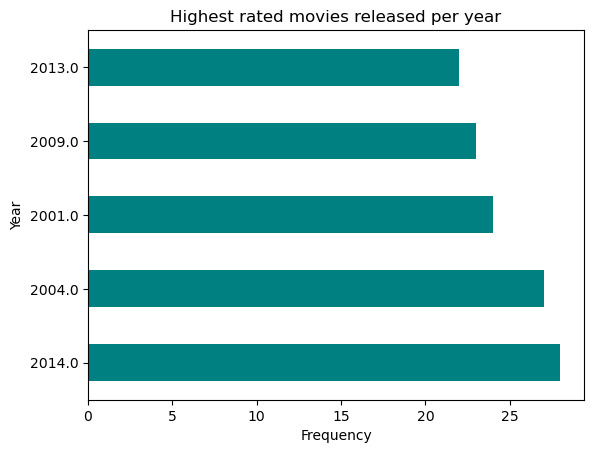

In [27]:
ry = df['Released_Year'].value_counts().head(5).plot(kind='barh', title="Highest rated movies released per year", color='teal')

ry.set_xlabel ('Frequency')
ry.set_ylabel('Year')

In [28]:
df.columns

Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'No_of_Votes',
       'Gross'],
      dtype='object')

### Looking at the non-numeric data First

Text(0, 0.5, 'Movie Frequency')

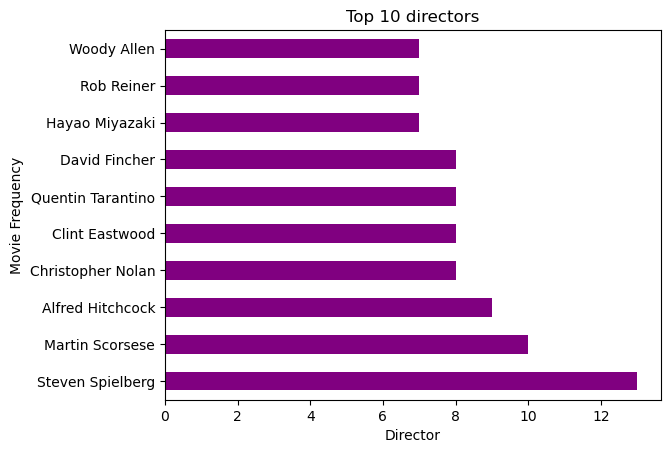

In [29]:
dr = df['Director'].value_counts().head(10).plot(kind='barh',title="Top 10 directors", color="purple")

dr.set_xlabel ('Director')
dr.set_ylabel('Movie Frequency')

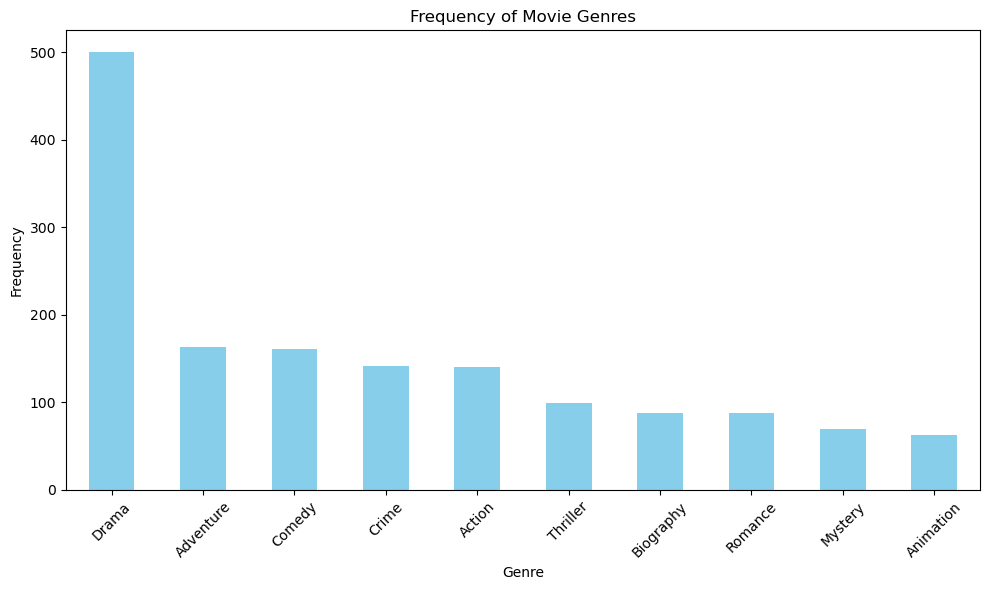

In [30]:
genres = df['Genre'].str.split(', ').explode()

# Count the frequency of each genre
genre_counts = genres.value_counts().head(10)

# Plotting the frequency of each genre
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Frequency')

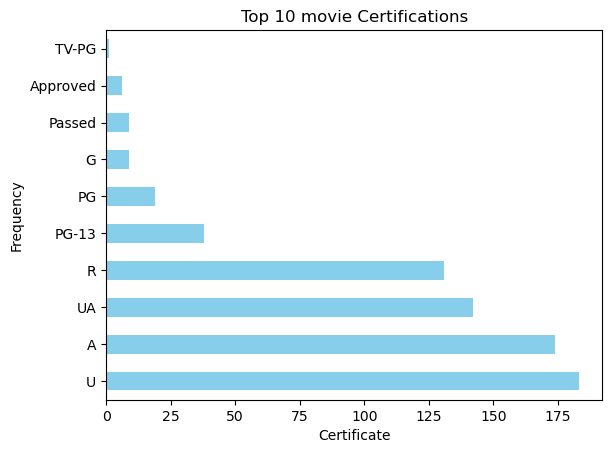

In [31]:
dr = df['Certificate'].value_counts().head(10).plot(kind='barh',title="Top 10 movie Certifications", color="skyblue")

dr.set_xlabel ('Certificate')
dr.set_ylabel('Frequency')

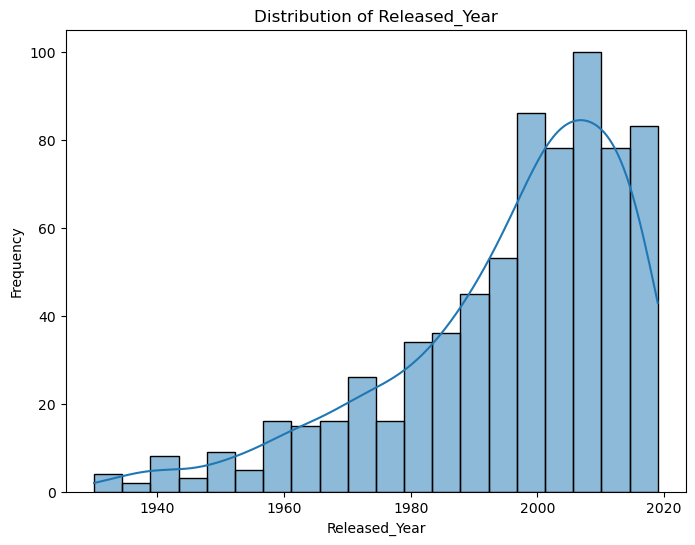

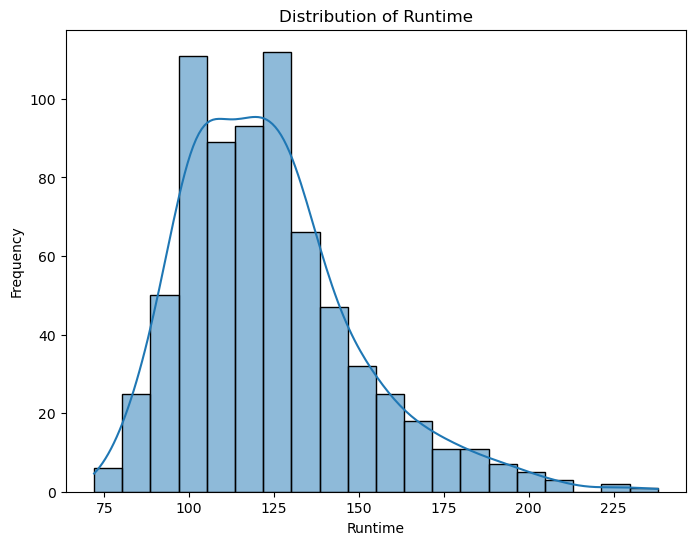

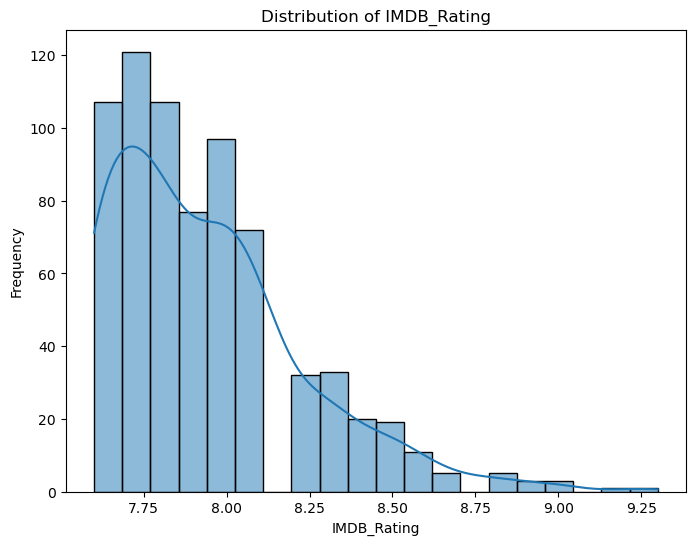

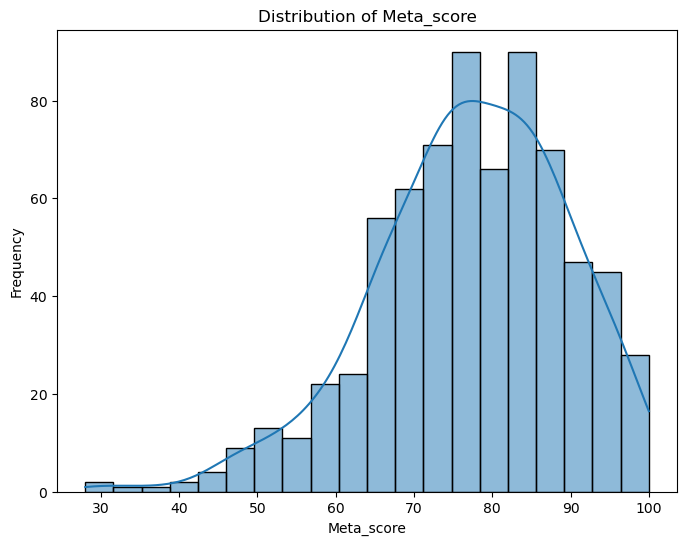

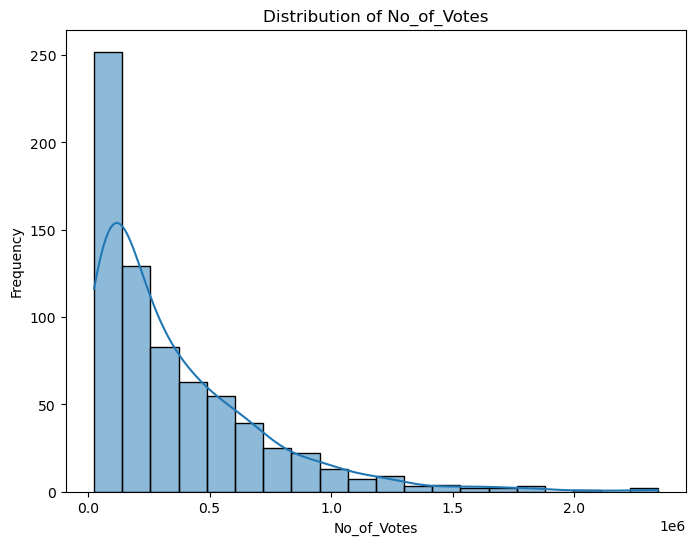

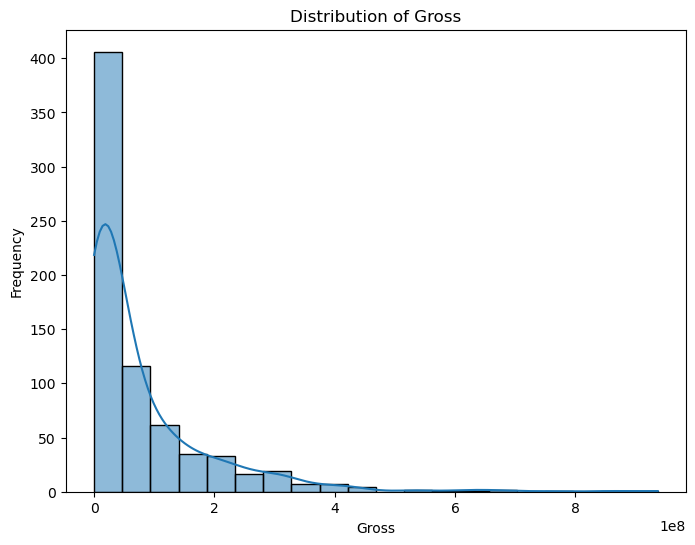

In [32]:
columns = df.columns
for col in columns:
    if df[col].dtype not in ['int64', 'float64']:
        continue
    
    # Plot histogram for numeric columns
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [33]:
df.columns

Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'No_of_Votes',
       'Gross'],
      dtype='object')

In [34]:
df['IMDB_Rating'].describe()

count    714.000000
mean       7.937115
std        0.293278
min        7.600000
25%        7.700000
50%        7.900000
75%        8.100000
max        9.300000
Name: IMDB_Rating, dtype: float64

# 4. Feature Relationships

In [35]:
df.columns

Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'No_of_Votes',
       'Gross'],
      dtype='object')

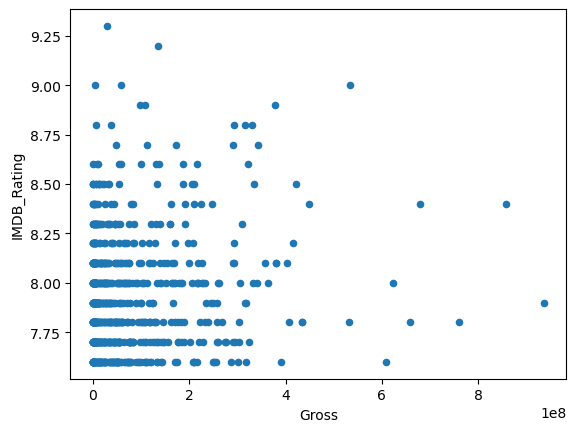

In [36]:
df.plot(kind="scatter",
        x="Gross",
        y="IMDB_Rating")
plt.show()

<Axes: xlabel='Gross', ylabel='IMDB_Rating'>

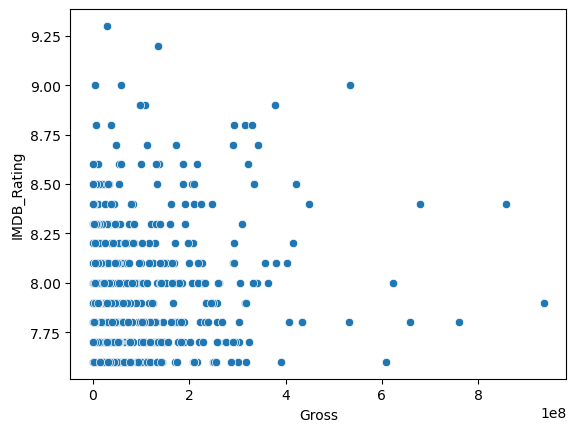

In [37]:
sns.scatterplot( x="Gross",
        y="IMDB_Rating",
        data= df)

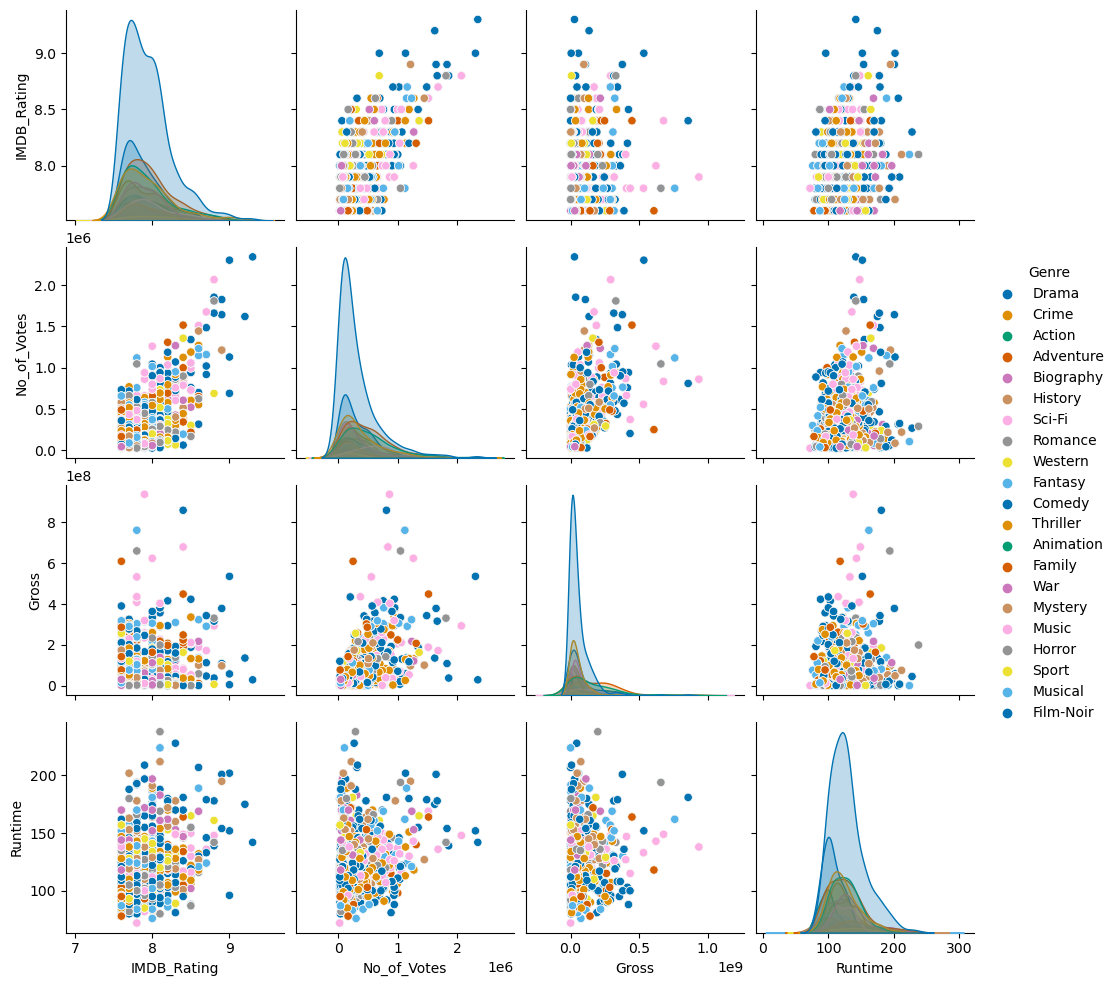

In [38]:
df_split_genre = df.assign(Genre=df['Genre'].str.split(', ')).explode('Genre')

# Resetting index to avoid duplicate label error
df_split_genre.reset_index(drop=True, inplace=True)

# Creating pairplot
#sns.pairplot(df_split_genre, vars=['IMDB_Rating', 'No_of_Votes', 'Gross', 'Runtime'], hue='Genre', palette='colorblind')

sns.pairplot(df_split_genre, vars=['IMDB_Rating', 'No_of_Votes', 'Gross', 'Runtime'], hue='Genre', palette='colorblind')

#sns.pairplot(df_split_genre, vars=['IMDB_Rating', 'No_of_Votes', 'Gross', 'Runtime'], palette='colorblind')

plt.show()

In [39]:
df.columns

Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'No_of_Votes',
       'Gross'],
      dtype='object')

In [40]:
df[['Released_Year', 'Runtime',
       'IMDB_Rating',  'Meta_score', 'No_of_Votes',
       'Gross']].corr()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
Released_Year,1.000000,-0.017970,-0.176768,-0.272678,0.194857,0.234679
Runtime,-0.017970,1.000000,0.258224,-0.005718,0.213657,0.168865
IMDB_Rating,-0.176768,0.258224,1.000000,0.280894,0.623142,0.125992
Meta_score,-0.272678,-0.005718,0.280894,1.000000,0.029744,-0.014801
No_of_Votes,0.194857,0.213657,0.623142,0.029744,1.000000,0.544882
Gross,0.234679,0.168865,0.125992,-0.014801,0.544882,1.000000


<Axes: >

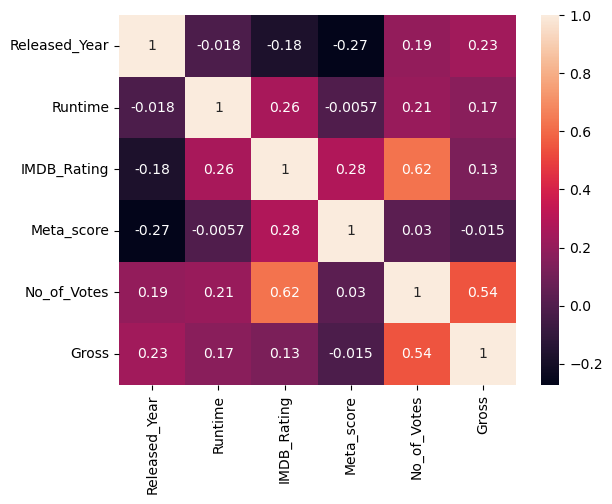

In [41]:
sns.heatmap(df[['Released_Year', 'Runtime',
       'IMDB_Rating',  'Meta_score', 'No_of_Votes',
       'Gross']].corr(), annot=True)

# 5.Ask a Question about the Dataset

Genre Dominance and Success:

    Which genre(s) dominate the top 1000 list in terms of frequency?
    Among these dominant genres, which ones tend to have the highest average ratings and user reviews?
    Are there any correlations between a movie's genre and its box office performance or critical acclaim?

This question would help uncover the relationship between genre dominance and the success metrics of movies within IMDb's top 1000 list. Analyzing which genres tend to perform best in terms of ratings, reviews, and commercial success could reveal interesting insights into audience preferences and industry trends.

Genre Evolution Over Time:

    How have the proportions of different genres within the top 1000 movies evolved over the decades?
    Are there any specific genres that have risen or declined significantly in popularity over time?
    Are there any patterns or trends in the emergence of new genres or sub-genres within the top 1000 list across different decades?

This question would allow for a longitudinal analysis of genre trends within IMDb's top 1000 movies, offering insights into how audience tastes and cinematic trends have evolved over time. It could also shed light on the influence of socio-cultural factors on genre preferences in cinema.

Cross-Genre Analysis:

    How frequently do movies in the top 1000 list exhibit elements of multiple genres or blend genres?
    Which combinations of genres are most common, and do they tend to be more successful in terms of ratings and reviews?
    Are there any notable examples of movies that successfully innovate or subvert genre conventions within the top 1000 list?

# Predictive Analysis

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [43]:
# Let's fill any missing values in 'Genre' and 'Overview' with empty strings
df['Genre'].fillna('', inplace=True)
df['Overview'].fillna('', inplace=True)


In [44]:
# Splitting comma-separated genres into individual tokens
df['Genre'] = df['Genre'].apply(lambda x: ' '.join(x.split(',')))

# Concatenate the 'Genre' and 'Overview' columns to create a text corpus
df['combined_features'] = df['Genre'] + ' ' + df['Overview']

In [45]:
# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_features'])

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [46]:
# Function to get recommendations based on similarity
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = df[df['Series_Title'] == title].index[0]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['Series_Title'].iloc[movie_indices]

In [47]:
# Example usage:
recommendations = get_recommendations('Fight Club')
print(recommendations)

971           Omohide poro poro
823         Glengarry Glen Ross
697                     Cabaret
508              Hable con ella
580       Manchester by the Sea
884    The Peanut Butter Falcon
780         Lost in Translation
778               The Machinist
367                 Ratatouille
806          As Good as It Gets
Name: Series_Title, dtype: object


## Questions

Genre Dominance and Success:

    Which genre(s) dominate the top 1000 list in terms of frequency?
    Among these dominant genres, which ones tend to have the highest average ratings and user reviews?
    Are there any correlations between a movie's genre and its box office performance or critical acclaim?

This question would help uncover the relationship between genre dominance and the success metrics of movies within IMDb's top 1000 list. Analyzing which genres tend to perform best in terms of ratings, reviews, and commercial success could reveal interesting insights into audience preferences and industry trends.


In [48]:
all_genres = []
for genres in df['Genre']:
    all_genres.extend(genres.split())

dominant_genres = pd.Series(all_genres).value_counts().head(3)
print("Dominant genres in top 1000 list in terms of frequency:")
print(dominant_genres)

Dominant genres in top 1000 list in terms of frequency:
Drama        500
Adventure    163
Comedy       161
dtype: int64


In [49]:
# Calculate average ratings and user reviews for each dominant genre
avg_ratings = {}
avg_reviews = {}
for genre in dominant_genres.index:
    genre_ratings = df[df['Genre'].str.contains(genre)]['IMDB_Rating']
    avg_ratings[genre] = genre_ratings.mean()
    genre_reviews = df[df['Genre'].str.contains(genre)]['No_of_Votes']
    avg_reviews[genre] = genre_reviews.mean()

In [50]:
print("\nAverage ratings for each dominant genre:")
print(avg_ratings)
print("\nAverage user reviews for each dominant genre:")
print(avg_reviews)


Average ratings for each dominant genre:
{'Drama': 7.9414, 'Adventure': 7.963190184049081, 'Comedy': 7.873291925465839}

Average user reviews for each dominant genre:
{'Drama': 317531.854, 'Adventure': 497113.4539877301, 'Comedy': 297764.3788819876}


## What to understand from Average Ratings and User Reviews:

    Drama appears to have the highest average rating among the dominant genres, followed closely by Crime and Comedy.
    When it comes to user reviews, Drama and Crime genres tend to have higher average numbers of votes compared to Comedy.

In [51]:
# Analyze correlations between genre and box office performance or critical acclaim

# Example: Calculating correlation between genre and box office performance (Gross)
genre_gross_correlation = {}
for genre in dominant_genres.index:
    genre_gross_correlation[genre] = df[df['Genre'].str.contains(genre)]['Gross'].corr(df[df['Genre'].str.contains(genre)]['IMDB_Rating'])

print("\nCorrelation between genre and box office performance (Gross):")
print(genre_gross_correlation)


Correlation between genre and box office performance (Gross):
{'Drama': 0.2306679338204457, 'Adventure': 0.17583505736999705, 'Comedy': 0.05850889176759757}


## What to understand from Correlation with Box Office Performance (Gross):

    Drama and Crime genres both show positive correlations with box office performance, albeit moderate. This suggests that movies belonging to these genres tend to perform relatively better at the box office.
    Comedy, on the other hand, shows a weak negative correlation with box office performance, indicating that there might not be a strong relationship between the Comedy genre and box office success.

In [52]:
# Example: Calculating correlation between genre and user reviews
genre_reviews_correlation = {}
for genre in dominant_genres.index:
    genre_reviews_correlation[genre] = df[df['Genre'].str.contains(genre)]['No_of_Votes'].corr(df[df['Genre'].str.contains(genre)]['IMDB_Rating'])

print("\nCorrelation between genre and user reviews:")
print(genre_reviews_correlation)


Correlation between genre and user reviews:
{'Drama': 0.6636031894985422, 'Adventure': 0.6283877393465744, 'Comedy': 0.3934472592565393}


## Correlation with User Reviews:

    Drama and Crime genres exhibit relatively strong positive correlations with user reviews. This suggests that movies in these genres tend to receive higher user ratings.
    Comedy also shows a positive correlation with user reviews, but it's weaker compared to Drama and Crime.

Overall, these observations indicate that Drama and Crime genres might be more favorable for achieving higher ratings and user reviews, as well as better box office performance. However, it's essential to note that correlation does not imply causation, and other factors such as the quality of the movie, marketing efforts, and audience preferences also play significant roles in determining a movie's success

# Question 2

Genre Evolution Over Time:

    How have the proportions of different genres within the top 1000 movies evolved over the decades?
    Are there any specific genres that have risen or declined significantly in popularity over time?
    Are there any patterns or trends in the emergence of new genres or sub-genres within the top 1000 list across different decades?

This question would allow for a longitudinal analysis of genre trends within IMDb's top 1000 movies, offering insights into how audience tastes and cinematic trends have evolved over time. It could also shed light on the influence of socio-cultural factors on genre preferences in cinema.

In [53]:
df.drop_duplicates(keep=False, inplace=True)
df.dropna(inplace=True)

In [54]:
# Preprocess data
df['Released_Year'] = df['Released_Year'].astype(int)
df['Decade'] = df['Released_Year'] // 10 * 10

In [55]:
print (df['Released_Year'])

0      1994
1      1972
2      2008
3      1974
4      1957
       ... 
990    1971
991    1970
992    1967
994    1964
997    1953
Name: Released_Year, Length: 713, dtype: int32


In [56]:
df_split_genre = df.assign(Genre=df['Genre'].str.split(', ')).explode('Genre')

# Resetting index to avoid duplicate label error
df_split_genre.reset_index(drop=True, inplace=True)

In [57]:
# Split genres
df['Genres'] = df['Genre'].str.split()

# Explode the dataframe to have one row per genre
df_exploded = df.explode('Genres')

# Group data by decade and count genre occurrences
genre_counts = df_exploded.groupby(['Decade', 'Genres']).size().unstack(fill_value=0)

# Calculate genre proportions within each decade
genre_proportions = genre_counts.div(genre_counts.sum(axis=1), axis=0)

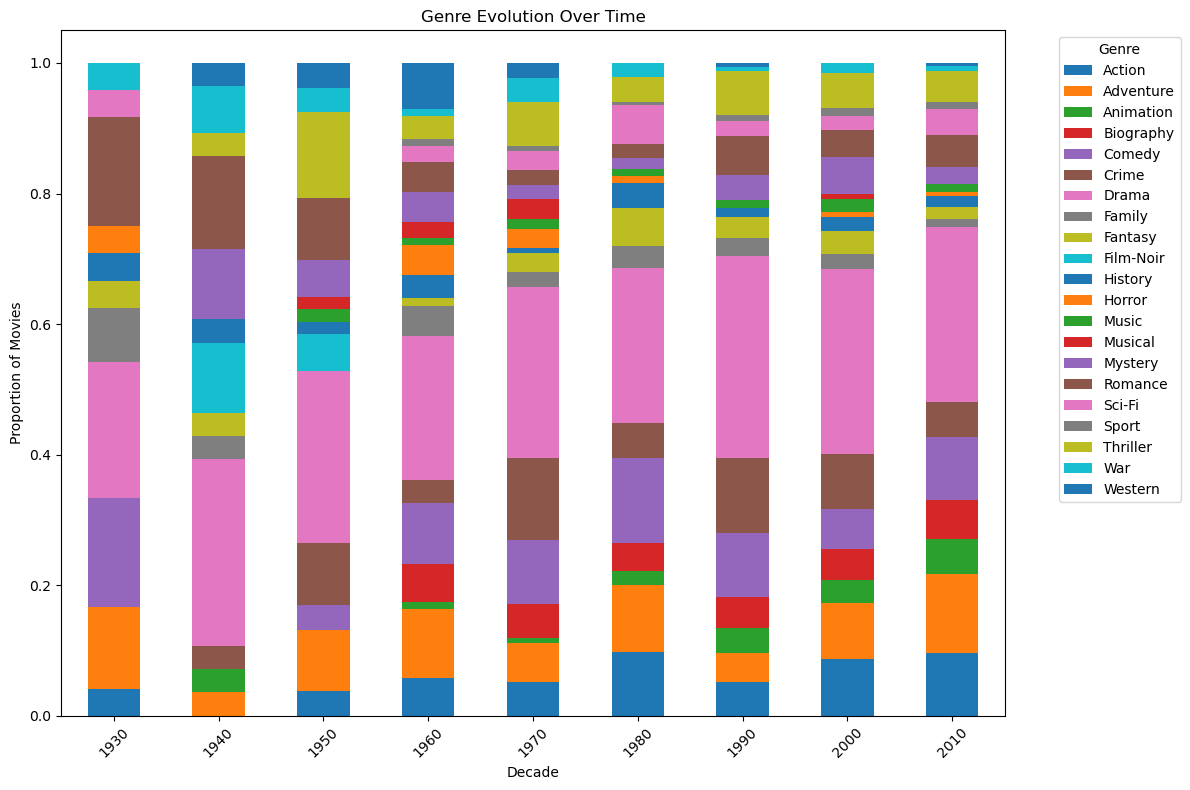

In [58]:
# Plot genre evolution over decades
genre_proportions.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Genre Evolution Over Time')
plt.xlabel('Decade')
plt.ylabel('Proportion of Movies')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

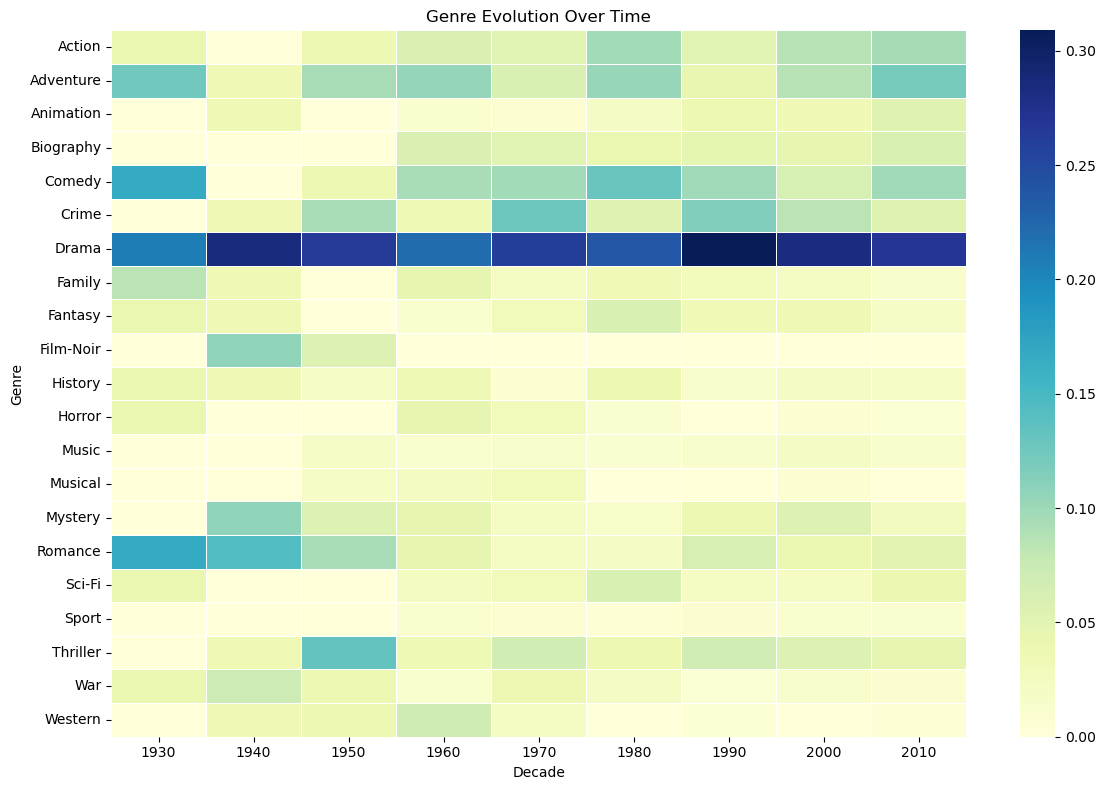

In [59]:
# Plot genre evolution over decades using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(genre_proportions.T, cmap='YlGnBu', linewidths=0.5)
plt.title('Genre Evolution Over Time')
plt.xlabel('Decade')
plt.ylabel('Genre')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()